# EDA(Exploratory Data Analysis) of Spotify Attributes


#### The purpose of this project is to master the EDA in 'Spotify Attributes' with Pandas framework.
## Goals of this project:
- Explore the 'Spotify Attributes' dataset with pandas framework.
- Build the pivot tables.
- Visualize the dataset and plot various graphs.
- Make conclusions of the dataset.

## Overview
- About the Dataset
- Importing Libraries
- Data Exploration
- Pivot Table
- Data Visualization
- Conclusion

### About the Dataset:
Spotify Attribute Dataset is from kaggle :"https://www.kaggle.com/datasets/geomack/spotifyclassification".     
Each row represents a song.There are 16 columns. 13 of which are song attributes, one column for song name, one for artist, and a column called "target" which is the label for the song. Here are the 13 track attributes: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence.
- Danceability : It describes whether a track is suitable to dance based on musical elements.The value 0.0 means that the track is least danceable. Songs with values 1.0 are the best for dancing.
- Duration_ms : It represents a duration of the track in milliseconds.
- Energy : It is a measure of energy which varies from 0.0 to 1.0. Energy shows a measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
- Instrumentalness :It describes whethed a track has a vocal. In this context vocal sounds are trated as instrumental. The highest value takes songs with Rap or spoken words.
- Key : This is an estimated key of the track. Integer values are mapped to the pitches of Pitch class notation. In case lack of key, the song takes value equal to -1.
- Liveness : It measures the presence of audience in the recorded song. The higher value increases probability that the track was played live. loudness : The means loudness of a track estimated in decibels (dB).
- Mode : It represents the modality of the voice. This value is scaled in range (0,1). Songs with value closer to 1, have Major melodic.
- Speechiness : The score of present spoken words in a track. Speech recordings are scored close to 1.0 value. Values in range (0,33 and 0,66) represent songs which may contain speech and music. The values below 0,33 threshold are represented by music and tracks without speech.
- Tempo : The average tempo of a track expressed in beats per minute (BPM).
- Time_signature: Mean signature of a track. This measure specifies number of beats in each bar.
- Valence : represents the musical positiveness provided by a track.

##### In this EDA we will try finding solutions to the questions stated below:
 - Top 10 loudest tracks
 - Top 10 Energetic tracks
 - Artist with the most danceability songs
 - Top 10 instrumentation tracks
 - Top 10 most popular artists


### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv
/kaggle/input/spotifyclassification/data.csv
/kaggle/input/most-streamed-songs-all-time/Features.csv
/kaggle/input/most-streamed-songs-all-time/Streams.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [3]:
df=pd.read_csv("/kaggle/input/spotifyclassification/data.csv")

In [4]:
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [5]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
df.tail()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.333,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.131,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.107,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.133,150.011,4.0,0.623,0,First Contact,Twin Moons
2016,2016,0.00281,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.141,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers


#### Checking some of the basic data attributes

In [7]:
df.shape

(2017, 17)

In [8]:
df.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [10]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# Data Cleaning

In [11]:
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

##### So,here we can say that our data is quite clean, their are no null values

In [12]:
df.duplicated().sum()

0

##### Thier are no duplicate values 

##### Here we can see that 'Unnamed: 0' column is not needed. So, Lets drop this column

In [13]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [14]:
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


#### Data Analysis:

#### Mean value of Audio Features of playlist

In [15]:
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [16]:
features_mean=df[["instrumentalness","speechiness","acousticness","energy","liveness","valence"]].mean()

In [17]:
features_mean

instrumentalness    0.133286
speechiness         0.092664
acousticness        0.187590
energy              0.681577
liveness            0.190844
valence             0.496815
dtype: float64

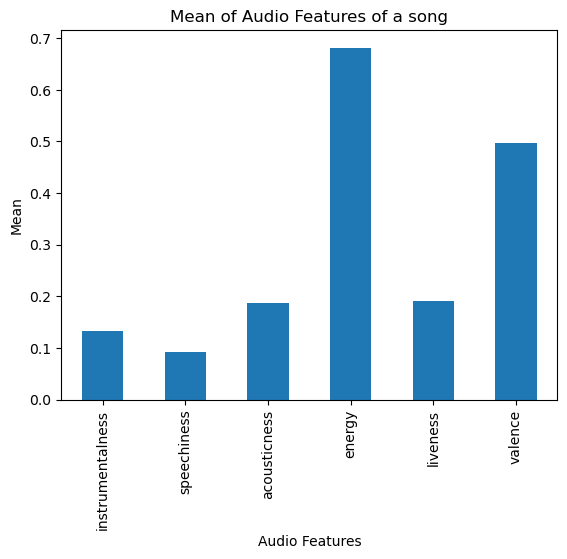

In [18]:
features_mean.plot.bar()
plt.xlabel("Audio Features")
plt.ylabel("Mean")
plt.title("Mean of Audio Features of a song")
plt.show()

Amoung all the attributes "Energy" has the heighest mean value.Followed by "Valence".


#### Std Deviation value of Audio Features of playlist

In [19]:
features_std=df[["instrumentalness","speechiness","acousticness","energy","liveness","valence"]].std()

In [20]:
features_std

instrumentalness    0.273162
speechiness         0.089931
acousticness        0.259989
energy              0.210273
liveness            0.155453
valence             0.247195
dtype: float64

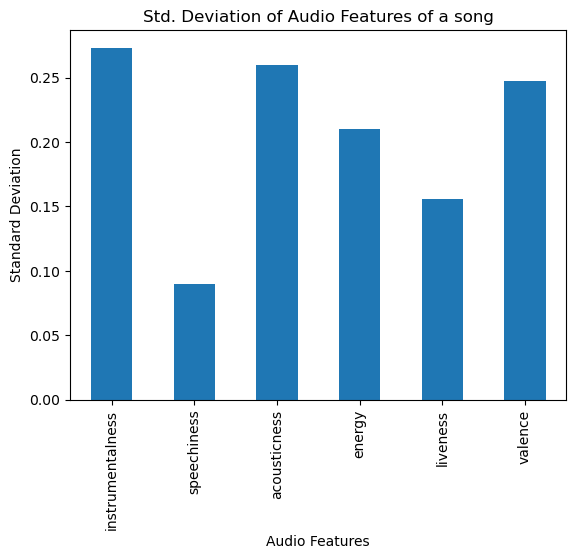

In [21]:
features_std.plot.bar()
plt.xlabel("Audio Features")
plt.ylabel("Standard Deviation")
plt.title("Std. Deviation of Audio Features of a song")
plt.show()

##### Amoung all the audio features of the song "instrumentalness" has the highest Standard Deviation.

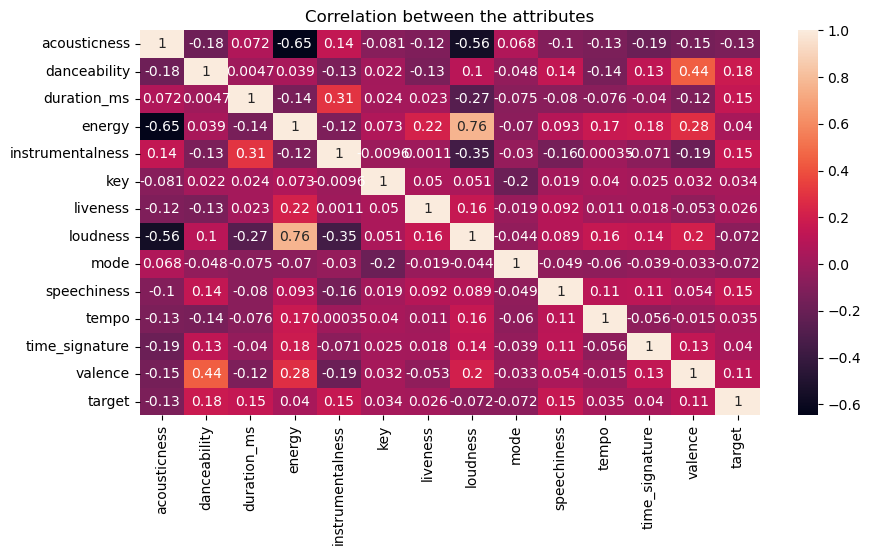

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

##### From the above heatmap we can conclude that their is no strong correlation between the attributes.

### Top 10 Loudest tracks

In [23]:
loudest_track=df[["loudness","song_title"]].sort_values(by="loudness")[:10]

In [24]:
loudest_track

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor
1571,-27.350,I Got It Bad And That Ain't Good
1541,-26.924,Two Sleepy People
1546,-25.766,Almas vaggvisa
817,-25.756,"Mozart: Requiem in D Minor, K. 626: VIII. Lacr..."
1537,-25.358,Blue in Green


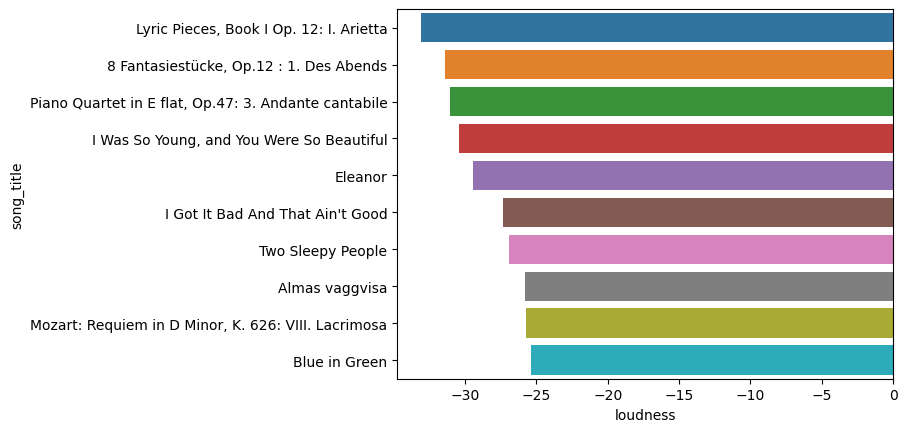

In [25]:
sns.barplot(x="loudness",y="song_title",data=loudest_track)
plt.show()

##### The above bar graph shows the top 10 loudest songs.

#### Top 10 Energetic track

In [26]:
energetic_tract=df[["song_title","energy"]].sort_values(by="energy",ascending=False)[:10]


In [27]:
energetic_tract

,song_title,energy
1299,No Absolution,0.998
1322,Pitchblack,0.997
1297,A Darkened Gospel,0.994
1347,Unanswered,0.993
2015,First Contact,0.992
1680,Paranoia,0.992
1332,Beautiful Agony,0.992
1328,Down into the Abyss,0.991
1681,Hated,0.990
1296,Black Colors,0.990


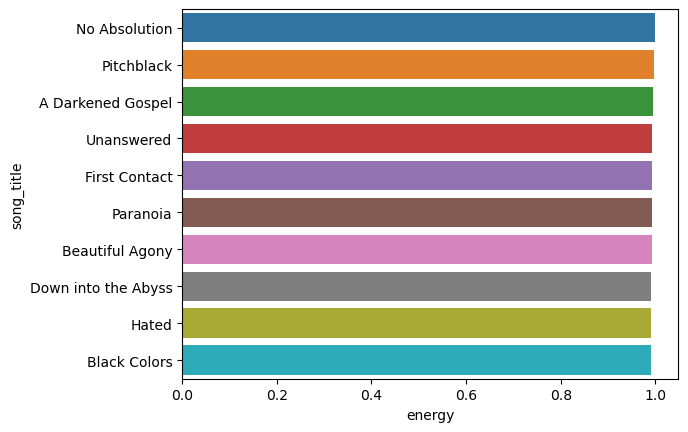

In [28]:
sns.barplot(y="song_title",x="energy",data=energetic_tract)
plt.show()

##### The above bar graph shows the list of most energetic songs

#### Artist with the most danceable song

In [29]:
dance=df[["danceability","song_title","artist"]].sort_values(by="danceability",ascending=False)[:10]

In [30]:
dance


,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice
1136,0.950,Bad Liar,Selena Gomez
1977,0.947,Fuck Kd,StaRR Lyfe
138,0.944,Sippin On Some Syrup,Three 6 Mafia
623,0.941,I'm Different,2 Chainz
1591,0.941,Little Green Apple,Tumble Tots


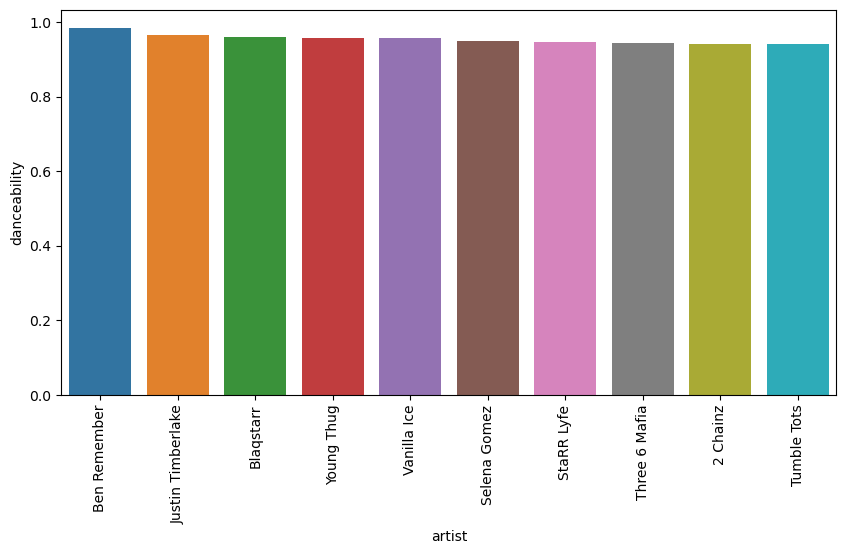

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(y="danceability",x="artist",data=dance)
plt.xticks(rotation='vertical')
plt.show()

##### The above bar graph shows the names of artist with the most dancable song

#### Top 5 instrumentalness tracks

In [32]:
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [33]:
top_instrument=df[["instrumentalness","song_title","artist"]].sort_values(by="instrumentalness",ascending=False)[:5]

In [34]:
top_instrument

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


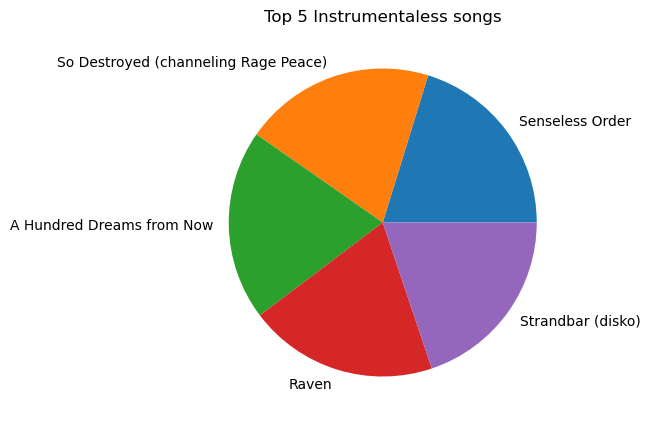

In [35]:
plt.figure(figsize=(10,5))
plt.pie(x="instrumentalness",data=top_instrument,labels=top_instrument.song_title)
plt.title("Top 5 Instrumentaless songs")
plt.show()

##### The above graph shows the list of top 5 instrumentless music

#### Top 10 popular Artist

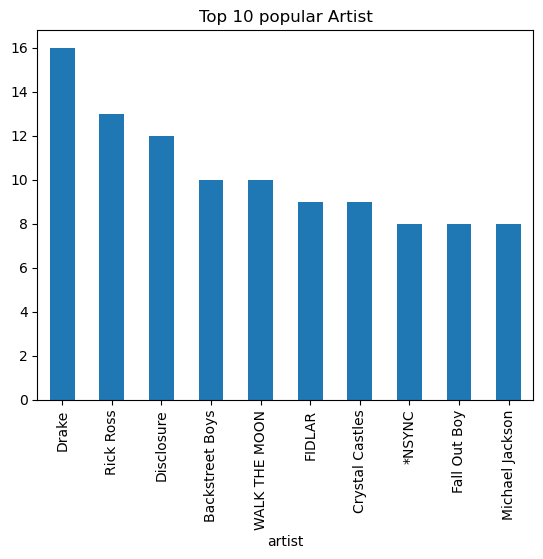

In [36]:
top_artist=df.groupby("artist")["song_title"].count().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("Top 10 popular Artist")

plt.show()


##### The above bar graph shows the list of most popular artist